### Problem 2 : Machine Learning with Kepler's Dataset

In [187]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

%matplotlib inline

In [222]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset
data = pd.read_csv("kepler_dataset.csv")
data.head(3)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436


In [4]:
#information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2743 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
#categorical and numerical columns
num_cols = data.select_dtypes(exclude='object')
cat_cols = data.select_dtypes(include='object')

In [8]:
#description of both types
num_cols.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [9]:
cat_cols.describe()

,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_tce_delivname
count,9564,2743,9564,9564,9218
unique,9564,2743,3,2,3
top,K00752.01,Kepler-227 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,4839,4847,8054


In [11]:
#checking for null values
data.isnull().sum().any()

True

In [12]:
#checking counts of null values
data.isna().sum()

kepid                   0
kepoi_name              0
kepler_name          6821
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

`Inferences: ` There are many values missing yet data seems complete. Few columns are not participating at all which can be drop later.

`Details :`
1. Number of features : 48 [44+5]
1. Target Feature : koi_disposition

#### Descriptive and Exploratory Analysis

In [16]:
koi_disp_df = data.groupby('koi_disposition').size()
koi_disp_count = pd.DataFrame(koi_disp_df.map(lambda count : {"count": count, "percentage": round(count/data.shape[0] * 100, 1)}).to_dict()).transpose()
koi_disp_count

,count,percentage
CANDIDATE,1984.0,20.7
CONFIRMED,2741.0,28.7
FALSE POSITIVE,4839.0,50.6


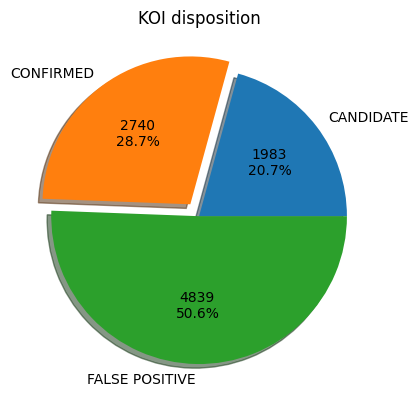

CANDIDATE         1984.0
CONFIRMED         2741.0
FALSE POSITIVE    4839.0
Name: count, dtype: float64

In [33]:
def pie_label(pct, vals):
    a = int(pct/100*np.sum(vals))
    return "{:d}\n{:.1f}%".format(a, pct)

plt.pie(koi_disp_count['count'],
        labels = koi_disp_count.index,
        explode = (0,0.1,0),
        autopct=lambda pct: pie_label(pct, koi_disp_count['count']),
        shadow=True)

plt.title('KOI disposition')
plt.show()

koi_disp_count['count']

In [35]:
data.groupby(['koi_disposition','koi_pdisposition'])['koi_score'].mean()

koi_disposition  koi_pdisposition
CANDIDATE        CANDIDATE           0.797803
CONFIRMED        CANDIDATE           0.961668
                 FALSE POSITIVE      0.746714
FALSE POSITIVE   CANDIDATE           1.000000
                 FALSE POSITIVE      0.037861
Name: koi_score, dtype: float64

In [45]:
data[(data['koi_disposition'] == 'CONFIRMED' ) & (data['kepler_name'].isnull())].shape[0]

0

In [154]:
df = data.copy()

In [155]:
#dropping columns

#these columns aren't having relatable information 
df = df.drop(columns=['kepid', 'kepoi_name', 'kepler_name'],axis=1)
#dropping columns having almost all NaN values
df = df.drop(columns=['koi_teq_err1','koi_teq_err2'],axis=1)

In [156]:
df['koi_tce_delivname'] = df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])
for column in df.columns[df.isna().sum()>0]:
    df[column] = df[column].fillna(df[column].mean())

In [157]:
#one-hot encoding
koi_tce_dummies = pd.get_dummies(df['koi_tce_delivname'], prefix='delivname',dtype=int)
df = pd.concat([df, koi_tce_dummies],axis=1)
df = df.drop('koi_tce_delivname',axis=1)

In [158]:
#transformation
df['koi_pdisposition'] = df['koi_pdisposition'].map({'CANDIDATE':1,'FALSE POSITIVE':0})

df['koi_disposition'] = df['koi_disposition'].map({'CONFIRMED':2,'CANDIDATE':1,'FALSE POSITIVE':0})

In [159]:
y= df['koi_disposition']
X= df.drop('koi_disposition',axis=1)

In [161]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.30146171 0.18461077 0.03170115 0.05515443 0.04263589 0.02126704
 0.0074101  0.00857567 0.00717469 0.00734632 0.01640392 0.01507402
 0.00681138 0.00739471 0.00590814 0.01045023 0.02134198 0.02161199
 0.01095173 0.00821527 0.00886243 0.01017721 0.00730063 0.00718156
 0.00910659 0.00620447 0.00597179 0.00580726 0.01818374 0.00608291
 0.00709989 0.01564961 0.00928964 0.00666442 0.0059145  0.00797514
 0.00561182 0.00685284 0.00557332 0.0063172  0.00624441 0.00568727
 0.0142351  0.00368114 0.01682397]


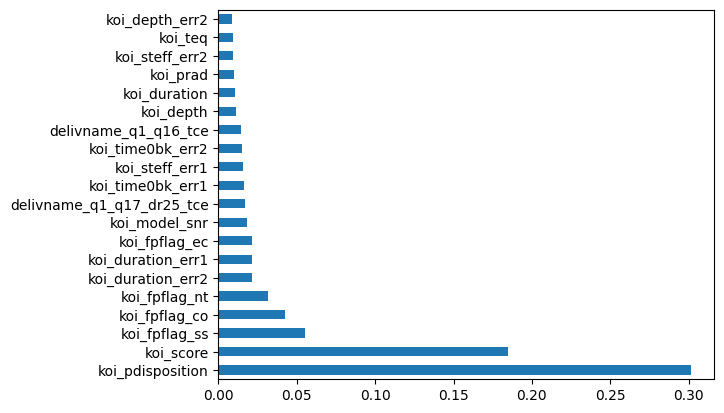

In [162]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [163]:
feature_importance[21:].index

Index(['koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'delivname_q1_q16_tce',
       'delivname_q1_q17_dr24_tce', 'delivname_q1_q17_dr25_tce'],
      dtype='object')

In [164]:
df = df.drop(columns = ['koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'delivname_q1_q16_tce',
       'delivname_q1_q17_dr24_tce', 'delivname_q1_q17_dr25_tce'])

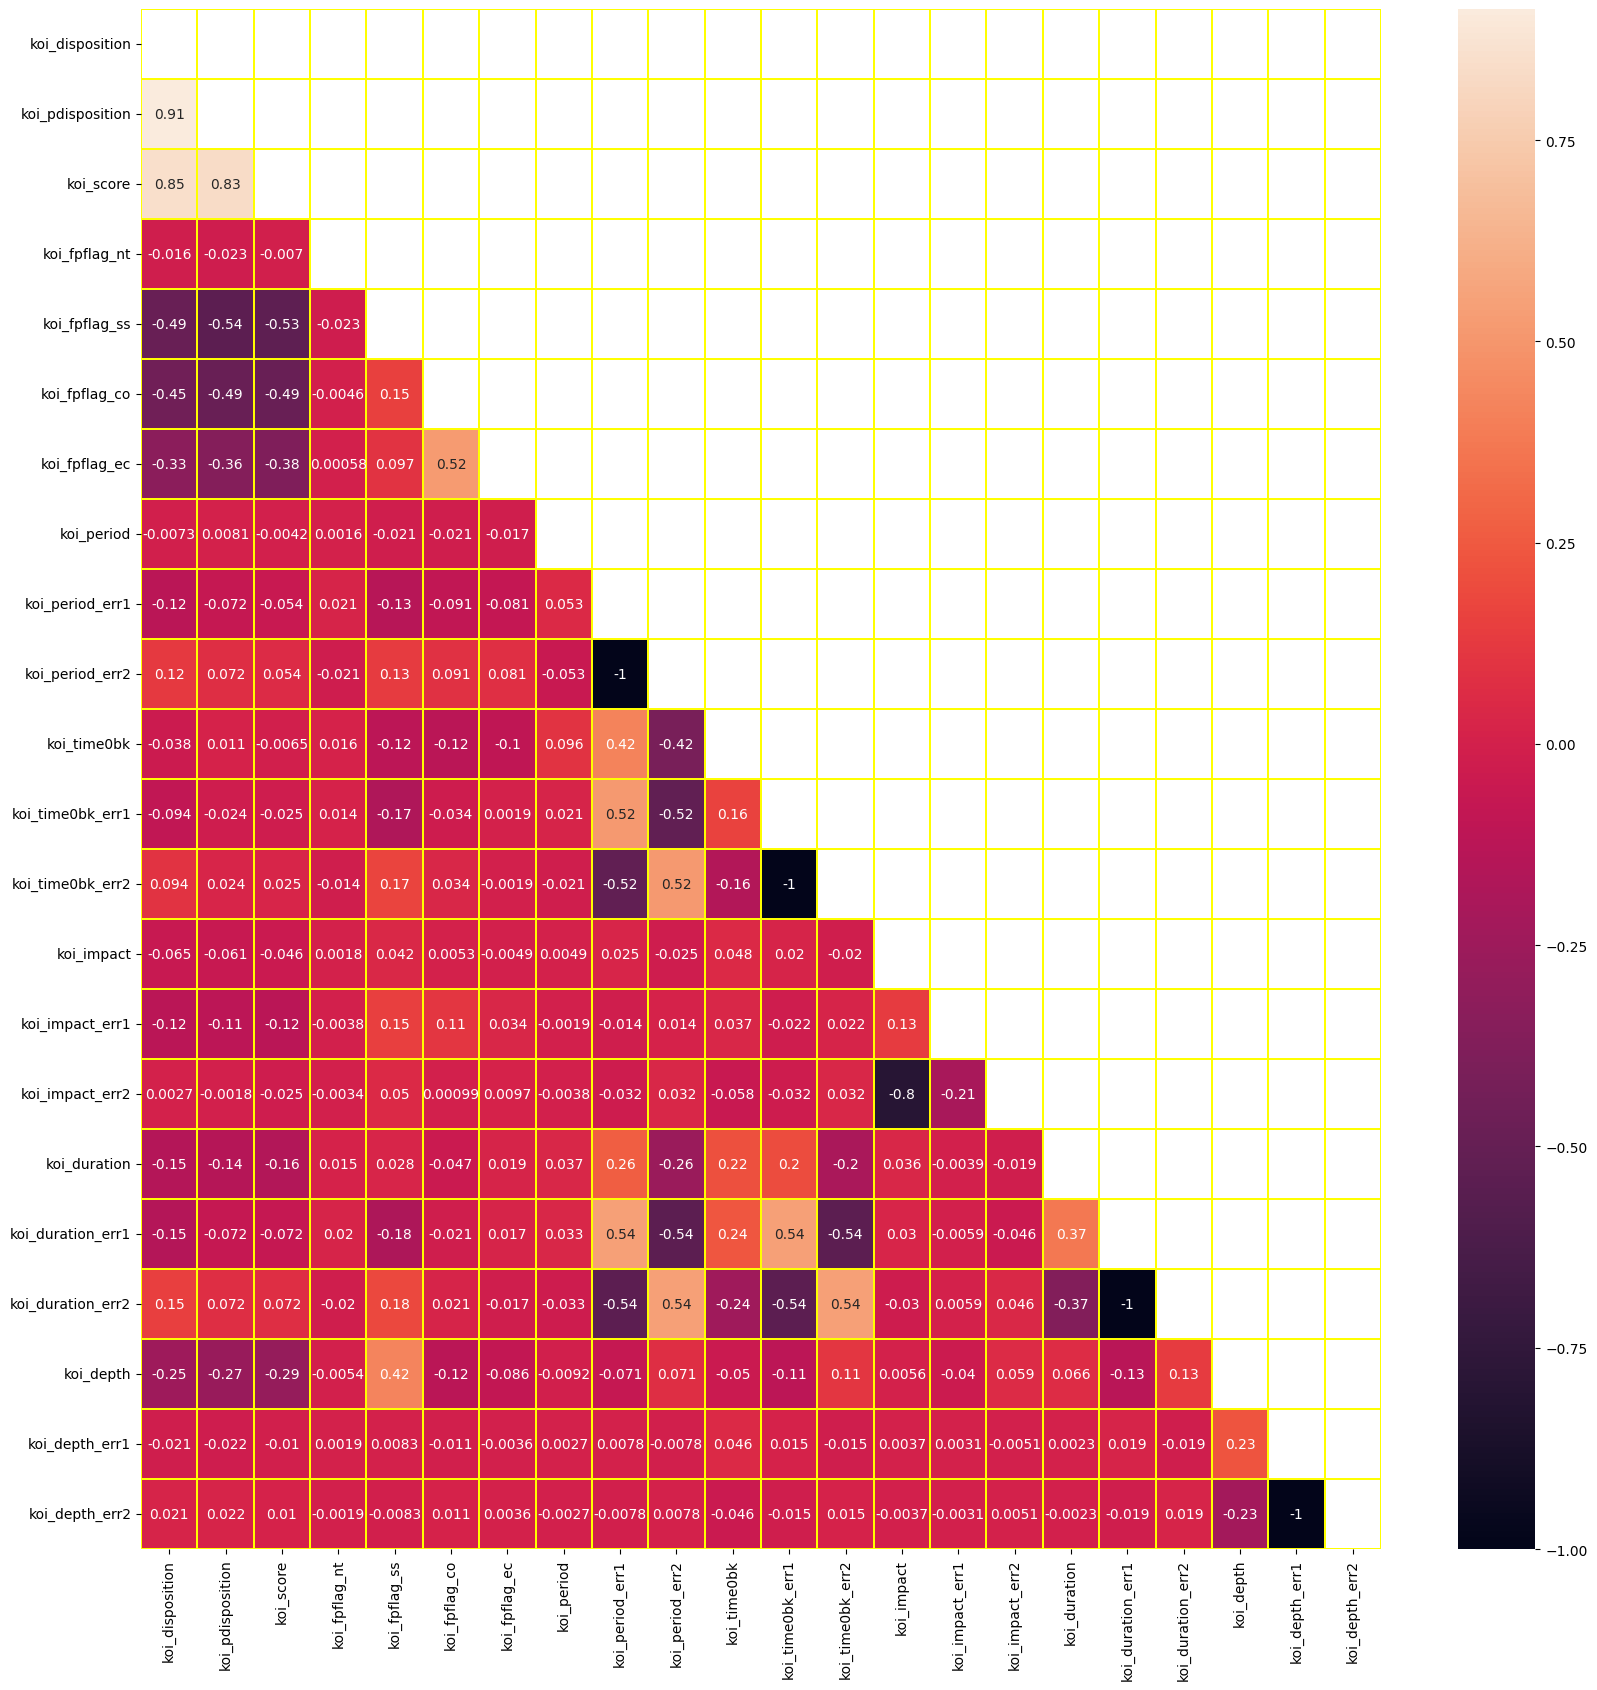

In [165]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.corr().index].corr(), 
            annot=True, 
            linecolor='yellow',
            linewidths=0.1,
           mask = np.triu(np.ones_like(df.corr())))
plt.show()

In [212]:
data1 = X.iloc[:,:2]
data2 = X.copy()

In [228]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,train_size=0.7, shuffle=True, random_state=1)

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [230]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [231]:
metrics.accuracy_score(y_test, y_pred)

0.9024390243902439

***

#### data1 : only koi_score and koi_pdisposition

In [232]:
X_train_1, X_test_1, y_train_1, y_test_1 = sklearn.model_selection.train_test_split(data1,y,train_size=0.7, shuffle=True, random_state=1)

In [234]:
clf = clf.fit(X_train_1, y_train_1)
y_pred_1 = clf.predict(X_test_1)
metrics.accuracy_score(y_test_1, y_pred_1)

0.872822299651568

### hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ['gini','entropy'],
              'max_depth' : [10,15,20,25],
              'max_features' : ['auto','sqrt','log2'],
              'ccp_alpha' : [0.1, 0.01, 0.001], 
              'random_state' : [40, 100, 500, 1024]}
tree_class = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = tree_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

In [236]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       max_features='auto', random_state=1024)

In [235]:
clf_again = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       max_features='auto', random_state=1024)
clf_again = clf.fit(X_train, y_train)
y_pred_again = clf_again.predict(X_test)
print(f"Accuracy : {metrics.accuracy_score(y_test, y_pred_again)}")

Accuracy : 0.9048780487804878


### Evaluation

In [241]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']))

Confusion Matrix

[[1427    0    3]
 [   0  379  229]
 [   2  131  699]]

Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.83
Macro Recall: 0.82
Macro F1-score: 0.82

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00      1430
     CANDIDATE       0.74      0.62      0.68       608
FALSE POSITIVE       0.75      0.84      0.79       832

      accuracy                           0.87      2870
     macro avg       0.83      0.82      0.82      2870
  weighted avg       0.87      0.87      0.87      2870



`Questions :`  
**Que1. Why did I choose the particular algorithm?**  
Ans1. I have choosen the decision tree because of it's simple rule based algorithm which simplfies the classification. Here, our target is broadly dependent on two columns which are easy helps in making choices. Decision Tree is the basic one, so we can use ensembled decision tree like random forest, adaboost to make better prediction.  



**Que2.What are the different tuning methods used for the algorithm?**  
Ans2. There are multiple methods which can be used in tuning our decision tree.
- Data : What columns are provided makes the algorithm efficient.
- criterion : Decision tree maps the impurity using two different formulaes. It's either "gini" or "entropy". This create difference in choosing the root by calculating the purity information of the node.
- max_depth : Depth of the decision tree defines if it has taken enough amount of steps to predict. if less, leads to underfit and if more, leads to overfit.
- min_samples_split : minimum number of samples required to split an internal node
- max_features : the number of features to consider when looking for the best split.  
- class_weight : weights associated with classes. This manually tweaks and better the chance of any class.

better the split, better the result.  

**Que3.Did you consider any other choice of algorithm? Why or Why not?**  
Ans3. Yes, I did consider other algorithms like naive bayes and KNN apart from the ensembling methods. From the data, we clearly see the difference betwneen all three categories of koi_disposition. This will help in clustering the same type of datapoints and classify them to a class. Also, we can use logistic if we decide on only two categories which are candidate and confirmed.

**Que4.What is the Accuracy?**  
Ans4. Accuracy of Vanilla decision tree :  90.2%  

**Que5. What are the different type of metrics that can used to evaluate the model?**  
Ans5. Confusion matrix gives the holistic evaluation of classification model like decision tree including the precision, recall and F1 score.

### Other Algorithms

In [251]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gs = GaussianNB()
gs = gs.fit(X_train, y_train)
gs_pred = gs.predict(X_test)

metrics.accuracy_score(y_test, gs_pred)

0.4522648083623693

In [250]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, knn_pred)

0.6770034843205575

In [252]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

metrics.accuracy_score(y_test, rf_pred)

0.9393728222996516

***